In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import math as m

# matplotlib plotting parameters
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'
mpl.rcParams['figure.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

# подключаем пакеты для рендеринга русского текста в LaTeX
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')
mpl.rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
mpl.rc('text.latex', preamble=r"\usepackage[russian]{babel}")

/home/artfin/.local/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [40]:
def transform( data, start = None, end = None ):
    if ( start == None ):
        start = 0
    if ( end == None ):
        end = len(data)

    x = data[start:end, 0]
    y = data[start:end, 1]

    return np.log10(x), np.log10(y)

def least_squares( x, y ):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, c

def approximate( m, c, x, xlin_start = None, xlin_end = None ):
    if ( xlin_start != None ):
        xmin = xlin_start
    else:
        xmin = np.min(x)
        
    if ( xlin_end != None ):
        xmax = xlin_end
    else:
        xmax = np.max(x)

    x = np.linspace(xmin, xmax, 100) 
    y = m*x + c
    return x, y

In [3]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [42]:
def process( filename, start = None, end = None, points_start = None, points_end = None, 
             xlin_start = None, xlin_end = None ):
    data = np.loadtxt(filename)
    x, y = transform( data, start, end )
    m, c = least_squares( x, y )
    
    xlin, ylin = approximate(m, c, x, xlin_start, xlin_end )
    
    x, y = transform( data, points_start, points_end )
    
    return m, x, y, xlin, ylin

<IPython.core.display.Javascript object>


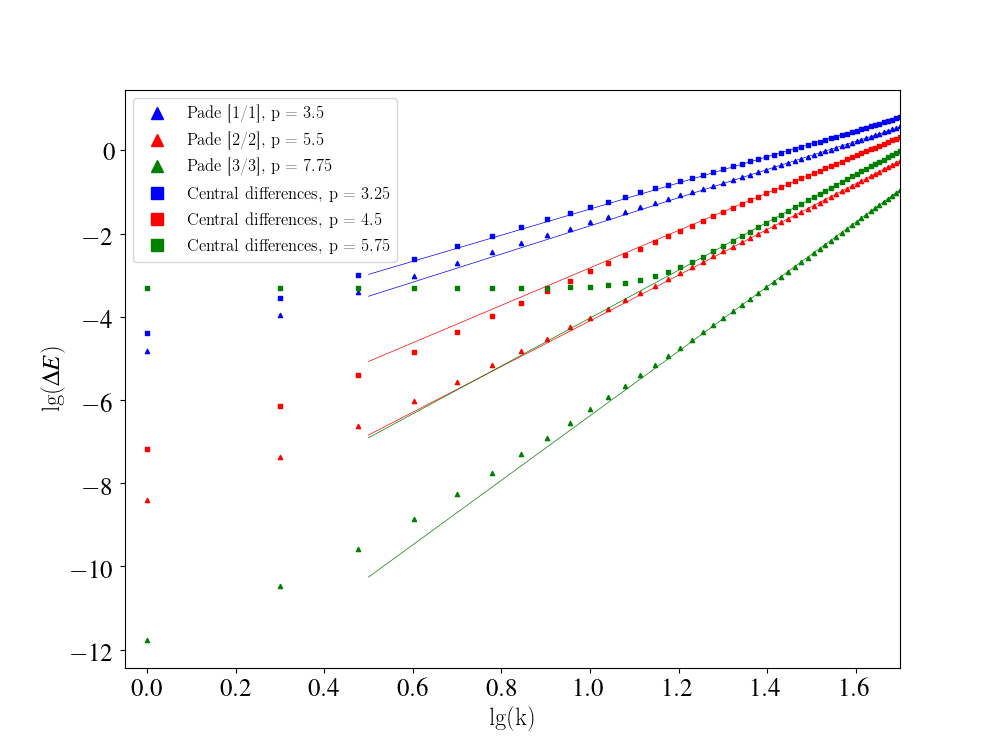

pade order: 1, m: 3.383761943524801
central difference order: 4; m: 3.1404887410302336
pade order: 2, m: 5.487886973086939
central difference order: 8; m: 4.499117275471428
pade order: 3, m: 7.75532083347157
central difference order: 12; m: 5.753994329214116


In [47]:
pade_orders = [1, 2, 3]
central_diff_orders = [4, 8, 12]
colors = ['blue', 'red', 'green']

fig = plt.figure(figsize=(10, 7.5))
ax = fig.add_subplot(111)

plt.xlabel("lg(k)")
plt.ylabel("lg($\Delta E$)")

pade_powers = [3.5, 5.5, 7.75]
cd_powers = [3.25, 4.5, 5.75]

legend_elements = []
for pade_order, power, color in zip(pade_orders, pade_powers, colors):
    legend_elements.append(
        Line2D([0], [0], color = color, lw = 0.0, marker = '^', markersize = 8, label = 'Pade [{0}/{0}], p = {1}'.format(
                pade_order, power))
    )
    
for cd_order, power, color in zip(central_diff_orders, cd_powers, colors):
    legend_elements.append(
        Line2D([0], [0], color = color, lw =0.0, marker = 's', markersize = 8, label = 'Central differences, p = {0}'.format(
            power))
    )

lw = 0.5
size_ = 9
start = 20
end = 50
start_points = 0
end_points = 50
xlin_start = 0.5
xlin_end = None

for pade_order, cd_order, color in zip(pade_orders, central_diff_orders, colors):
    filename = './pade_{0}_{0}_diff_k.txt'.format(pade_order, pade_order)
    m, x, y, xlin, ylin = process(filename, start, end, start_points, end_points, xlin_start, xlin_end )
    print('pade order: {0}, m: {1}'.format(pade_order, m))
    plt.plot(xlin, ylin, linewidth = lw, color = color)
    plt.scatter(x, y, s = size_, color = color, marker = '^')
    
    filename = './{0}order_central_difference_diff_k.txt'.format(cd_order)
    m, x, y, xlin, ylin = process(filename, start, end, start_points, end_points, xlin_start, xlin_end )  
    print('central difference order: {0}; m: {1}'.format(cd_order, m))
    plt.plot(xlin, ylin, linewidth = lw, color = color)
    plt.scatter(x, y, s = size_, color = color, marker = 's')

plt.xlim(-0.05, 1.7)
    
ax.legend( handles = legend_elements, prop = {'size': 12} )
plt.show()

In [48]:
plt.savefig("pade_vs_cd_diff_k.eps", format = 'eps', dpi = 1000)